# 目次
- ⓪ Google Colab の使い方
- ① いきなりですが、深層学習を作って、手書き文字を認識してみましょう
- ② 次にANNではない教師なし学習や教師あり学習をやってみます。
- ③ データを統計解析してみます
- ④ 時系列因果解析
- ⑤ ちょっと自分事と思ってやってみましょう。
- ⑥ 例として、顕微鏡画像を解析してみます。


# ⓪ Google Colab の使い方
- このファイルは実行コード例としておいているだけですので、理解していただく必要は全くありません。
- グレーの箱ごとに実行できます（セルと言います）
  - 「コード」と「テキスト」の２種類のセルがあります（上のメニューから新規に作れます）
  - コードセルでは、左側の ▶ を押すと実行されます（Ctrl＋Enterや、Shift＋Enterでも）。
- 最初は、実行すると以下の警告が出て、時間もかかりますが、「このまま実行」を押してください。
  - 『警告: このノートブックは Google が作成したものではありません。』
  - これは「勝手に誰かがつくったので危ないかもよ？Googleのせいじゃないよ？」ということです
  - ２回目以降は非常に速いです。
- 右上の 『★Gemini』を押すと、AIに何でも聞けます。
  - また、勝手にコードも書いてくれます。
  - ここで対話しながら勉強していくことができるので、誰か（人間）に教えてもらう必要はありません。
- （上部メニューの「ランタイム」→「ランタイムのタイプを変更」、から、GPU（T4 GPU）を選ぶこともできます。ただし、このファイルの計算は何もせずにCPUのままでも全く問題ないです）
- アンダースコア"_"は見えにくいので注意。スペースじゃないです。


In [1]:
# 計算できます。「#」以下は無視されます。
1 + 2

3

In [2]:
# 文字に値を代入できます。最後の行だけ出力が見えます。
a = 2
b = 3
print(a*b) # *は掛け算。printは、最後の行じゃなくても結果を表示。
a**b # これで２の３乗という意味です。

6


8

x = [0.  0.5 1.  1.5 2.  2.5]
y = [ 3.   3.5  5.   7.5 11.  15.5]


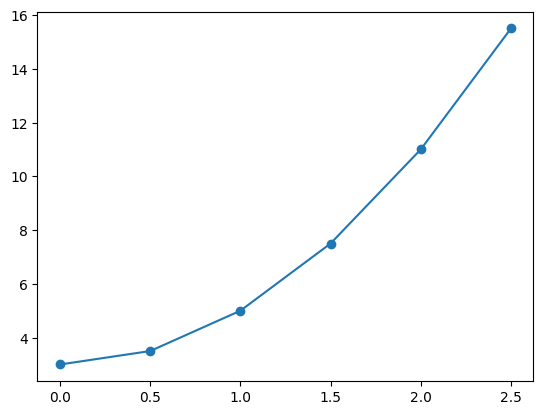

In [3]:
# とりあえず ライブラリ を読み込んで、グラフでも書いてみましょう。

# 便利な関数たちを呼び出して使えます（以下は召喚する呪文みたいなやつです）。「as xxx」のようにして名前を短く省略できます。
import numpy as np # 数値計算用（Numerical Pythonの略）
import matplotlib.pyplot as plt  # グラフプロット用

x = np.arange(0, 3, 0.5) #0から3まで0.1刻み。3は含まれないことに注意。
y = a * (x**2) + b  # いわゆる2次関数
plt.plot( x, y , 'o-' )
print('x =', x)  # printをつけると最後の行じゃなくても出力します。
print('y =', y)  # printをつけると最後の行じゃなくても出力します。


# ① いきなりですが、深層学習を作って、手書き文字を認識してみましょう
- 先に TensorFlow ライブラリ を使ってやってみますが、下記に同じことを Pytorch でもやります。
- なお正確には、これらはライブラリではなくフレームワークと呼びますが、細かい話なので無視してください。


In [4]:
# とりあえず、TensorFlowを呼び出して、手書き文字のライブラリをダウンロードしてみます。
import tensorflow as tf

# 手書き文字の MNIST データセットをダウンロードして、X_train, y_train, X_test, y_test に入れておく。
# X_train：学習用（トレーニング用）の画像セット。６万枚。
# y_train：学習用セットの答え。６万個の数字（0～9）
# X_test：試験用（学習に使わない）の画像セット。１万枚。
# y_test：試験用セットの答え。１万個の数字（0～9）

mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# 入力正規化（0～255の値だった画像データを、0～1の値にする）
X_train = X_train.astype('float32')/255.0
X_test  = X_test.astype('float32')/255.0

print("X_train には、6万個の 28ピクセルx28ピクセル の画像が入った： ", X_train.shape)
print("y_train には、6万個の 答え が入った： ", y_train.shape)
print("X_test には、1万個の 28ピクセルx28ピクセル の画像が入った： ", X_train.shape)
print("y_test には、1万個の 答え が入った： ", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train には、6万個の 28ピクセルx28ピクセル の画像が入った：  (60000, 28, 28)
y_train には、6万個の 答え が入った：  (60000,)
X_test には、1万個の 28ピクセルx28ピクセル の画像が入った：  (60000, 28, 28)
y_test には、1万個の 答え が入った：  (10000,)


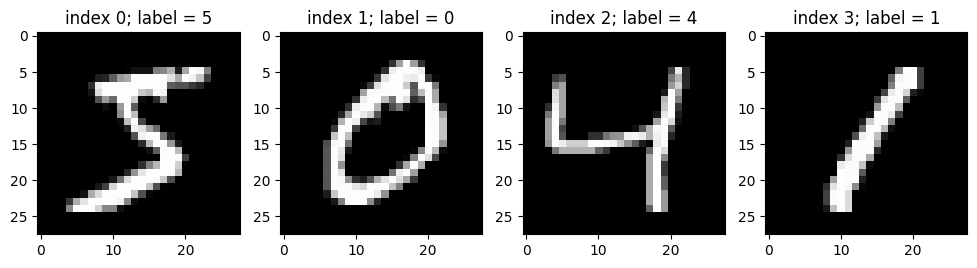

In [5]:
# ちょっと絵を見てみる

plt.figure(figsize=(12,3)) # 全体の画像サイズを定義しているだけ
for i in range(4): # 以下を、iが0,1,2,3として、４回繰り返す、という呪文
    plt.subplot(1,4,i+1) # 1行4列のうち、i+1番目に絵画する
    plt.imshow(X_train[i], cmap='gray') # 画像(image)を見せる(show)関数
    plt.title(f"index {i}; label = {y_train[i]}") # 各画像の上に文字をつける


In [6]:
# ANNを作る
# 最も簡単な、入力層、隠れ層、出力層、の３層。
#（一般的には隠れ層が３つあると深層と呼ぶので、ここはまだANNですが、下記のようにほぼ同じ）

model = tf.keras.models.Sequential([
    # (None, 28, 28) -> (None, 784)
    tf.keras.layers.Flatten(input_shape=(28, 28), name='input'),

    # Layer1: Linear mapping: (None, 784) -> (None, 256)
    tf.keras.layers.Dense(256, name='784->256'),
    # Activation function: ReLU
    tf.keras.layers.Activation(tf.nn.relu, name='relu'),

    # Layer2: Linear mapping: (None, 256) -> (None, 10)
    tf.keras.layers.Dense(10, name='256->10'),
    # Activation function: Softmax
    tf.keras.layers.Activation(tf.nn.softmax, name='softmax')
])

# モデル構造を表示
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 784->256 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu (Activation)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 256->10 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 学習する

# 最適化アルゴリズム、評価の基準、評価の指標などを指定する
# なお、adamなど、ここで選んだものは標準的で、性能も安定しており、原理もわかりやすく、実装も簡単で、実際にも広く使われるものです。
# シンプルな勾配降下法（SGD）では学習率は一定ですが、各パラメタごとの学習率を変えて、効率を上げた感じのもので、シンプルながら高効率です。
# 状況によっては別のものが良い場合もありますが、詳しくなってから考えると良いと思います。
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 学習（Training）
history = model.fit(         # 学習を実行し、学習過程の履歴（loss, accuracy など）を history に保存
    X_train, y_train,        # 学習用データと正解ラベル
    batch_size=100,          # 一度に学習するデータ数（バッチサイズ）
    epochs=5,                # 学習データを繰り返し使う回数（エポック数）
    verbose=1,               # 学習の進行状況を表示（0=非表示, 1=プログレスバー, 2=エポックごとの簡易表示）
    validation_data=(X_test, y_test)  # 検証用データと正解ラベル（学習中に過学習をチェック）
)

# モデルの評価(evaluation)

# テストデータ、つまりトレーニング中には一度も見たことないデータで評価（といっても上記の最後のval accuracyと同じ）
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("accuracy:", round( test_acc*100, 2), '%')


Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8653 - loss: 0.4928 - val_accuracy: 0.9572 - val_loss: 0.1484
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9608 - loss: 0.1349 - val_accuracy: 0.9705 - val_loss: 0.0999
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9764 - loss: 0.0841 - val_accuracy: 0.9741 - val_loss: 0.0828
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9830 - loss: 0.0592 - val_accuracy: 0.9767 - val_loss: 0.0757
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9875 - loss: 0.0453 - val_accuracy: 0.9760 - val_loss: 0.0716
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9701 - loss: 0.0860
accuracy: 97.6 %


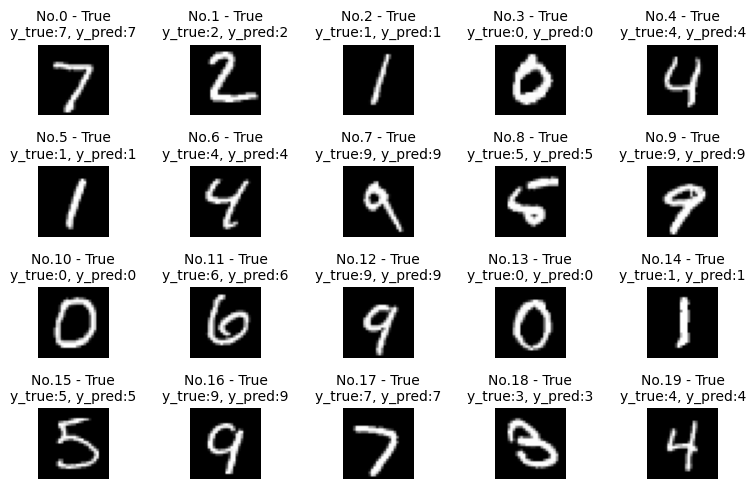

In [8]:
# 学習したモデルがちゃんと答えているかの確認

fig = plt.figure(figsize=(8, 5))

ROW = 4
COLUMN = 5

for i in range(ROW * COLUMN):
    y_true = y_test[i]
    y_pred = model.predict(X_test[i].reshape(1,28,28), verbose=0)[0].argmax()

    if y_true == y_pred:
        result = "True" # Correct answer from the model
    else:
        result = "False" # Incorrect answer from the model

    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title("No.{} - {}\ny_true:{}, y_pred:{}".format(i, result, y_true, y_pred), fontsize=10)
    plt.axis("off")

fig.tight_layout()
fig.show()


In [9]:
# DNNを作る。（例えば、以下のように、階層を増やすことも簡単にできる。隠れ層が３層あるので深層）
# でもタスクが簡単なので別に良くはならない。（すでに98%だし）

# モデルの作成
model = tf.keras.models.Sequential([
    # (None, 28, 28) -> (None, 784)
    tf.keras.layers.Flatten(input_shape=(28, 28), name='input'),

    # Layer1: Linear mapping: (None, 784) -> (None, 512)
    tf.keras.layers.Dense(512, name='fc_1'),
    tf.keras.layers.Activation(tf.nn.relu, name='relu_1'),

    # Layer2: Linear mapping: (None, 512) -> (None, 256)
    tf.keras.layers.Dense(256, name='fc_2'),
    tf.keras.layers.Activation(tf.nn.relu, name='relu_2'),

    # Layer3: Linear mapping: (None, 256) -> (None, 256)
    tf.keras.layers.Dense(256, name='fc_3'),
    tf.keras.layers.Activation(tf.nn.relu, name='relu_3'),

    # Layer4: Linear mapping: (None, 256) -> (None, 10)
    tf.keras.layers.Dense(10, name='dense_3'),
    tf.keras.layers.Activation(tf.nn.softmax, name='softmax')
])

# モデル構造を表示
model.summary()

# コンパイル
# 最適化アルゴリズム、評価の基準、評価の指標などを指定する
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 学習（Training）
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test))

# モデルの評価(evaluation)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("accuracy:", round( test_acc*100, 2), '%')




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_1 (Dense)                    │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1 (Activation)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2 (Activation)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_3 (Activation)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 601,610 (2.29 MB)

 Trainable params: 601,610 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8855 - loss: 0.3922 - val_accuracy: 0.9663 - val_loss: 0.1129
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9735 - loss: 0.0883 - val_accuracy: 0.9742 - val_loss: 0.0893
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9834 - loss: 0.0534 - val_accuracy: 0.9779 - val_loss: 0.0706
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9876 - loss: 0.0384 - val_accuracy: 0.9769 - val_loss: 0.0744
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9916 - loss: 0.0275 - val_accuracy: 0.9800 - val_loss: 0.0650
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9758 - loss: 0.0771
accuracy: 98.0 %


In [10]:
# 同じこと(簡単ANN)を、Pytorchでやってみる（MNISTの取得から、モデル構築、評価まで、一つのセルにつっこんだ）
# TensorFlowはGoogle製、PyTorchはFacebook製。今は、研究はPyTorchがメジャー、実運用とかではTensorFlowに強みもある感じ

# まずは呼び出し
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# データ（28x28 のグレースケールを [0,1] に正規化）
tr = transforms.ToTensor()
train_ds = datasets.MNIST(root='.', train=True,  download=True, transform=tr)
test_ds  = datasets.MNIST(root='.', train=False, download=True, transform=tr)
train_dl = DataLoader(train_ds, batch_size=100, shuffle=True)
test_dl  = DataLoader(test_ds,  batch_size=100)

# モデル（Flatten → 784→256→ReLU→256→10）
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 256),
    nn.ReLU(),
    nn.Linear(256, 10)          # CrossEntropyLoss を使うので出力は logits（Softmax不要）
).to(device)

# モデル表示
print("Model")
print(model)

# 学習
crit = nn.CrossEntropyLoss()
opt  = optim.Adam(model.parameters())
for epoch in range(5):
    model.train()
    for x, y in tqdm(train_dl, desc=f"Epoch {epoch+1}"):
        x, y = x.to(device), y.to(device)
        opt.zero_grad()
        loss = crit(model(x), y)
        loss.backward()
        opt.step()

# 評価
model.eval()
correct = total = 0
with torch.no_grad():
    for x, y in test_dl:
        x, y = x.to(device), y.to(device)
        pred = model(x).argmax(1)
        correct += (pred == y).sum().item()
        total   += y.size(0)
print('accuracy:', round(100*correct/total, 2), '%')


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 496kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.73MB/s]


Model
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)


Epoch 5: 100%|██████████| 600/600 [00:07<00:00, 80.65it/s]


accuracy: 97.66 %


21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
97715/97715 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


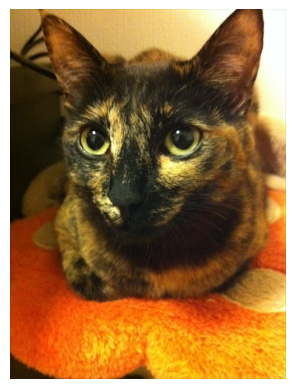

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Egyptian_cat         : score = 0.492
Siamese_cat          : score = 0.207
tabby                : score = 0.071
tiger_cat            : score = 0.026
lynx                 : score = 0.019


In [11]:
# 実際には、自分で深層学習モデルを作るというよりは、既にあるものを使う方が多いと思います。例えば。
import tensorflow as tf
import requests

# 学習済みの深層学習モデルをダウンロード
model = tf.keras.applications.efficientnet.EfficientNetB0()

# ネットにある適当な画像を読み込み
img_path = tf.keras.utils.get_file(origin="https://raw.githubusercontent.com/hosodakazufumi/note/main/data/IMG_2604_R.jpg")
x = tf.keras.utils.load_img(img_path, color_mode="rgb")
x = tf.keras.utils.img_to_array(x)  # float32, 0..255

# 画像表示
plt.imshow(x.astype(np.uint8)); plt.axis("off"); plt.show()

# 画像の前処理
x = tf.image.resize(x, model.input_shape[1:3])  # [H,W,3], float32
x = tf.keras.applications.efficientnet.preprocess_input(x)  # モデルに合わせたスケーリング
x = tf.expand_dims(x, 0)  # [1,H,W,3]

# 推論
y = model.predict(x)[0]  # 1バッチ分の出力
from tensorflow.keras.applications.efficientnet import decode_predictions
for cls, name, score in decode_predictions(y[None, ...], top=5)[0]:
    print(f"{name:20s} : score = {score:.3f}")




In [12]:
# EfficientNetB0 は EfficientNet の中でも最も小さいが、それでもかなり層が深い
from tensorflow.keras.utils import plot_model

#plot_model(model, to_file='efficientnetb0.png', show_shapes=True, show_layer_names=True, dpi=80)
plot_model(model, to_file='efficientnetb0.png', show_shapes=False, show_layer_names=False, dpi=3)

max abs diff: 7.1525574e-07


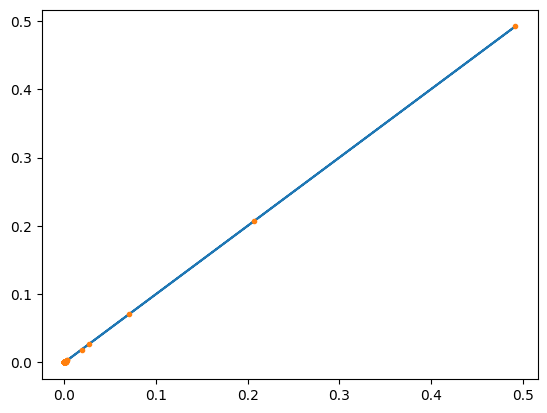

In [13]:
# この大きいDNNを、ちょっとだけ（最終層だけ）分解して、何をしているか見てみましょう。自分で分解するとわかった気になれます。
from tensorflow.keras.models import Model

# ある入力 x に対しての、元モデルの出力（上記と同じ）
y_model = model.predict(x, verbose=0).flatten()

# 以下は、最終層を再構成してみている
# 最終層直前の特徴 x を取り出すモデル
feat_model = Model(inputs=model.input, outputs=model.layers[-2].output)

# ある入力 x に対して、中間特徴量（最後の手前のニューロンの発火パターン）を得る
x_features = feat_model.predict(x, verbose=0)

# 最終 の W, b を取得
last = model.layers[-1]
W, b = last.get_weights()

# 得られた x_features, W, b から、最終層を計算してみる。
z = x_features @ W + b # 「@」は行列の掛け算
z = z.flatten()
exp_z = np.exp( z - z.max() )
y_manual = exp_z / exp_z.sum()

# 簡単な計算で層が構成されていることが確認できる
plt.plot( y_model , y_model ,'-')
plt.plot( y_manual , y_model ,'.')
print("max abs diff:", np.max(np.abs(y_manual - y_model))) # ほとんど違いは無い、と言う確認


# ② 次にANNではない教師なし学習や教師あり学習をやってみます。
- 科学技術用のライブラリである scipy と、より機械学習に特化したライブラリである scikit-learn（sklearn）を用います

In [14]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [15]:
# 適当なデータファイルを読み込みます。

url = 'https://raw.githubusercontent.com/hosodakazufumi/note/main/data/data_sample.csv'
df = pd.read_csv(url)

df


,ID,Name,class,Body Weight (kg),Height (cm),BMI,Body Fat Percentage (%),Waist Circumference (cm),Hip Circumference (cm),Waist-to-Hip Ratio,...,Heart Rate (bpm),Blood Glucose Level (mg/dL),Total Cholesterol (mg/dL),LDL Cholesterol (mg/dL),HDL Cholesterol (mg/dL),Triglycerides (mg/dL),HbA1c (%),Blood Oxygen Saturation (%),Bone Density (g/cmﾂｲ),Basal Metabolic Rate (kcal/day)
0,1000,Alice,0,57.610417,175.996393,18.786507,24.866068,108.211731,83.574593,0.721329,...,66.191575,112.824540,215.250140,103.254978,46.751628,139.656073,4.181929,96.582100,1.041283,1789.747987
1,1001,Bob,1,69.885877,181.290770,20.659982,11.797085,73.526117,112.837857,0.869728,...,77.142878,85.882222,197.372971,122.192574,72.726636,56.021648,6.807114,99.847498,1.023918,1204.882507
2,1002,Charlie,2,99.239703,189.132896,22.559459,34.608242,95.834333,108.334789,0.810786,...,68.250208,137.355543,212.125645,81.184689,56.372695,133.846574,5.063768,95.031543,0.896397,2249.464133
3,1003,David,0,89.827506,187.644023,21.759206,10.665353,117.146546,123.529229,0.759572,...,65.136431,104.099207,228.134157,116.683626,47.937475,81.475541,5.435611,96.893492,0.821594,1254.786881
4,1004,Eva,1,54.295298,156.459600,25.305027,16.951926,104.951442,85.463941,0.727878,...,93.646964,76.218348,219.549203,91.711426,59.404974,86.161107,6.258412,97.665159,0.824162,1933.767292
5,1005,Frank,2,70.592433,154.159988,28.616694,24.071701,80.891488,118.165903,0.934419,...,65.590661,127.733143,196.590260,108.002159,70.961852,174.221729,6.040106,97.610391,0.868287,2358.784874
6,1006,Grace,0,53.866029,150.151290,27.289212,29.196798,75.457995,116.408781,0.790541,...,93.891095,123.708985,233.083373,142.972305,75.208700,148.214885,5.794434,99.566950,1.142120,1427.113738
7,1007,Hannah,1,83.926989,159.001325,19.778940,19.948289,84.752505,82.252866,0.721786,...,75.387045,73.997707,204.303376,139.229522,79.359758,114.691210,6.481544,99.094307,1.007077,1824.580793
8,1008,Ivy,2,57.144487,162.813941,23.131414,27.882388,92.763740,94.648403,0.921035,...,62.431572,140.351760,225.863839,102.704837,46.137607,129.440779,6.900101,96.894284,0.886615,2377.191047
9,1009,John,0,86.353718,184.514874,18.759845,34.517226,91.059666,127.399558,0.782365,...,82.009947,106.876686,167.740840,139.023225,62.566718,191.187029,6.743837,96.840431,0.921096,1639.233332


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


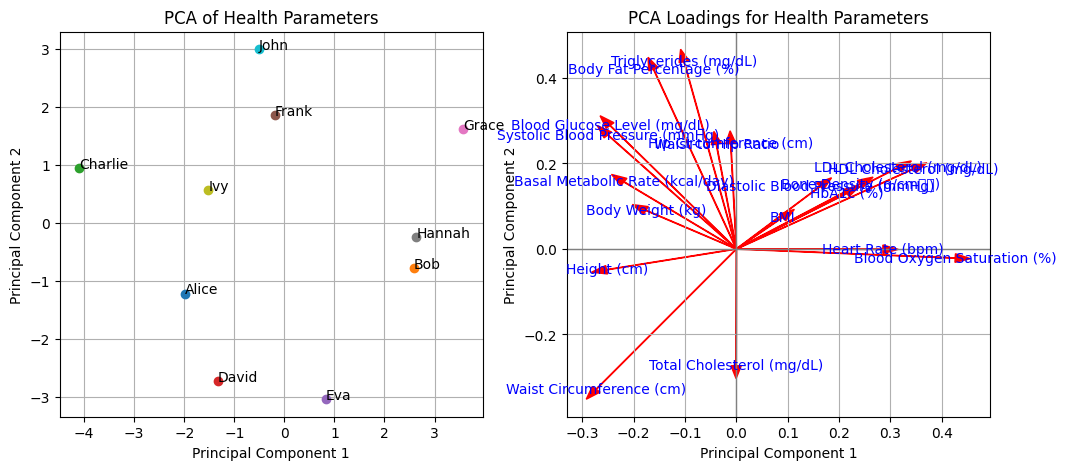

In [16]:
# 教師なし、次元削減（主成分分析: PCA = Principal Component Analysis）

# データ部分だけとってきて、numpyにします。
xname = df['Name'].values
xparams = df.columns[3:].values
x = df.iloc[:,3:].values.copy()
x_normalized = StandardScaler().fit_transform(x)    # 特徴ごとに平均0・分散1へ標準化

# PCA実行
pca = PCA(n_components=4)
xpc = pca.fit_transform(x_normalized)

# グラフを書く
plt.figure(figsize=(12,5))
plt.subplot(121)
for i in range(x.shape[0]):
  plt.plot(xpc[i,0], xpc[i,1],'o')
  plt.text(xpc[i,0], xpc[i,1], xname[i])

plt.title('PCA of Health Parameters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)


# 各パラメタの寄与を表示
kiyo = pca.components_.T

plt.subplot(122)
for i in range(len(xparams)):
    plt.arrow(0, 0, kiyo[i, 0], kiyo[i, 1], color='r', head_width=0.02)
    plt.text(kiyo[i, 0], kiyo[i, 1], xparams[i], color='b', ha='center', va='center')

plt.title('PCA Loadings for Health Parameters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()


3クラスタの割当: [3 1 3 2 2 3 1 1 3 3]


Text(0, 0.5, 'Distance')

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


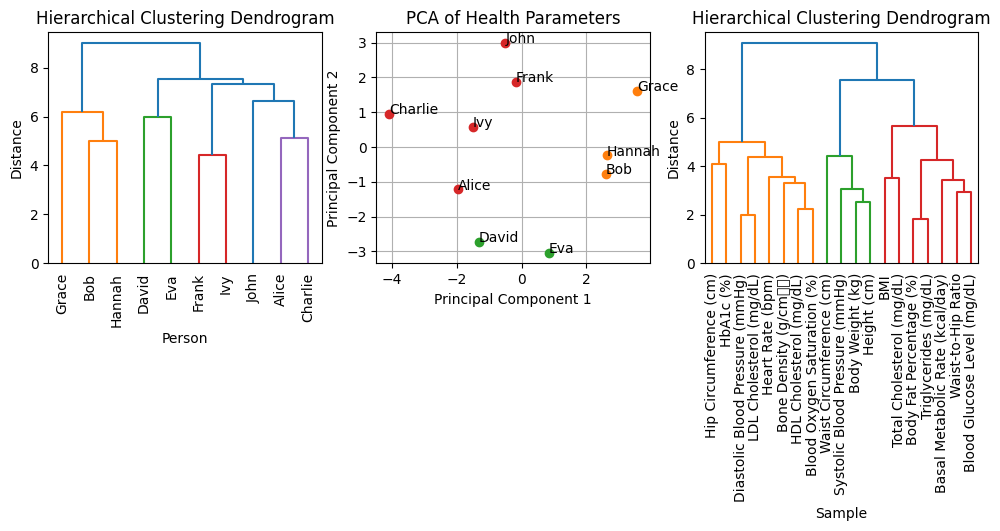

In [17]:
# 教師なし、分類（階層クラスタリング）

import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# データ部分だけとってきて、numpyにします。
xname = df['Name'].values
xparams = df.columns[3:].values
x = df.iloc[:,3:].values.copy()
x_normalized = StandardScaler().fit_transform(x)    # 特徴ごとに平均0・分散1へ標準化

# 階層クラスタリング（ward法）
Z = linkage(x_normalized, method='ward')
labels_k = fcluster(Z, t=3, criterion='maxclust')
print("3クラスタの割当:", labels_k)

# Plot the dendrogram
plt.figure(figsize=(12,3))
plt.subplot(131)
dendrogram(Z, labels=xname, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Person')
plt.ylabel('Distance')


# 上記のPCAで、このクラスタ分類を見てみる
cmap10 = plt.get_cmap("tab10")
plt.subplot(132)
for i in range(x.shape[0]):
  plt.plot(xpc[i,0], xpc[i,1],'o',color=cmap10(labels_k[i]) )
  plt.text(xpc[i,0], xpc[i,1], xname[i])

plt.title('PCA of Health Parameters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)


# 逆に、パラメタに対してもやってみる

# 階層クラスタリング（ward法）
Z = linkage(x_normalized.T, method='ward')

# グラフを書く
plt.subplot(133)
dendrogram(Z, labels=xparams, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')


/tmp/ipython-input-1707321126.py:44: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1707321126.py:44: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


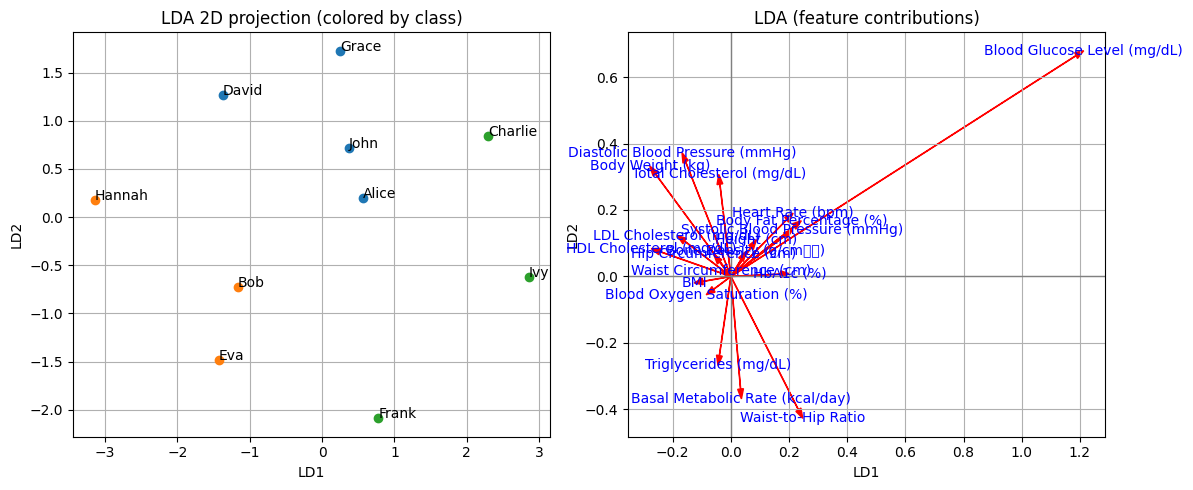

In [18]:
# 教師有、次元削減。与えられた"class"を使う（この後、新たな人のデータに対してこの次元を使うことでクラスがわかる）
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# データ部分だけとってきて、numpyにします。
xname = df['Name'].values
xparams = df.columns[3:].values
x = df.iloc[:,3:].values.copy()
x_normalized = StandardScaler().fit_transform(x)    # 特徴ごとに平均0・分散1へ標準化
y = df["class"].values
y = [0,1,2,0,1,2,0,1,2,0]


# 標準化 → LDA(2次元)
lda = LDA(n_components=2)
xlda = lda.fit_transform(x_normalized, y)  # shape: (n_samples, 2)

# 2Dプロット（classで色分け、各点に名前を注記）
cmap10 = plt.get_cmap("tab10")
plt.figure(figsize=(12,5))
plt.subplot(121)
for i in range(x.shape[0]):
  plt.plot(xlda[i,0], xlda[i,1],'o',color=cmap10(y[i]) )
  plt.text(xlda[i,0], xlda[i,1], xname[i])

plt.title("LDA 2D projection (colored by class)")
plt.xlabel("LD1"); plt.ylabel("LD2")
plt.grid(True)
plt.tight_layout()


# 特徴量の寄与ベクトル（scalings_ を利用）
plt.subplot(122)
loadings = lda.scalings_[:, :2]  # 各特徴の係数 (n_features × 2)
for i, feat in enumerate(xparams):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1],
              color='r', head_width=0.02, length_includes_head=True)
    plt.text(loadings[i,0], loadings[i,1], feat,
             color='b', ha='center', va='center')
plt.axhline(0, color='grey', lw=1); plt.axvline(0, color='grey', lw=1)
plt.title("LDA (feature contributions)")
plt.xlabel("LD1"); plt.ylabel("LD2"); plt.grid(True)
plt.tight_layout()
plt.show()



# ③ データを統計解析してみます
- 科学技術用のライブラリである scipy、統計モデリング用の statsmodels、さらにscipyやstatsmodelsではカバーしていない多重検定などを提供する scikit_posthocs を用います

In [19]:
# scikit-posthocs は、今のGoogleColabではデフォルトでインストールされていないので、インストールします。
# こんな感じで、『ModuleNotFoundError: No module named 'XXX'』みたいに怒られたら、簡単にインストールできます。
!pip install scikit-posthocs

In [20]:
# import
import pandas as pd
import seaborn as sns
import scipy # pip install scipy
import statsmodels # pip install statsmodels
import scikit_posthocs # pip install scikit-posthocs

In [21]:
# サンプルデータファイルを読み込みます。
# ７人の人の血圧データだとします。

url = 'https://raw.githubusercontent.com/hosodakazufumi/note/main/data/data_matrix_B.csv'
xmat = pd.read_csv(url)
xname = xmat.columns.values

xmat

,Alice,Bob,Charlie,David,Eva,Frank,Grace
0,66.260000,86.990000,80.570000,66.230000,87.380000,65.600000,74.930000
1,64.037952,88.125488,78.643391,67.020812,89.267530,68.492891,71.185896
2,66.084142,87.936356,80.123808,66.202297,88.100383,66.353962,72.416365
3,70.389389,85.844614,83.687399,64.589934,84.594516,61.192709,76.588876
4,74.460032,83.683739,86.309413,63.556247,81.359299,56.302790,80.308437
...,...,...,...,...,...,...,...
95,68.862341,88.072094,80.875399,66.835952,87.364838,65.658903,68.537143
96,64.709356,89.750637,77.580278,68.349284,90.837557,70.125525,64.509043
97,61.316202,91.385161,74.313203,69.336714,93.971811,74.543048,59.998562
98,59.330314,92.690517,72.370003,69.766914,95.912817,76.909765,57.742184


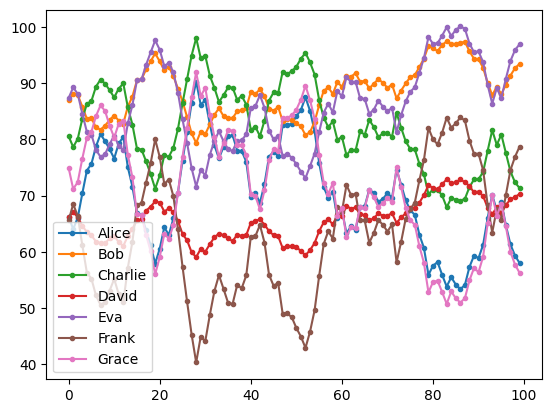

In [22]:
# 全員分のデータをPlotしてみます。
for i in range(xmat.shape[1]):
    plt.plot( xmat.iloc[:,i], '.-' , label=xname[i])
plt.legend()


<Axes: >

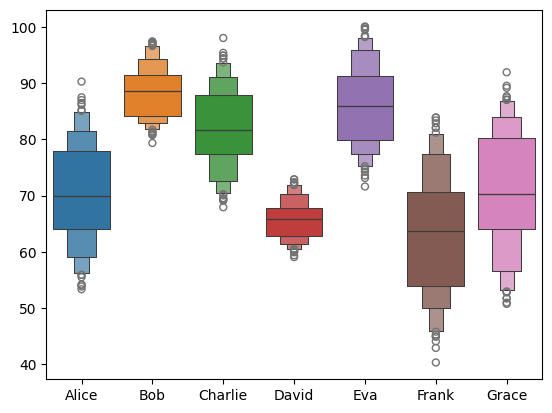

In [23]:
# 横軸をつぶして、分布で各人の違いを見てみます
sns.boxenplot( data=xmat )


In [24]:
# 最初に、基本である２群の検定をやってみます。
# 二人に有意な差はあるか？に対して、
# 「真実は差が無いなら、偶然こんな差が出るのは確率Pだ」みたいなPを求め、5%以下なら「差がある」とします。
# つまり、P = 0.05 以下であれば、差がある、とします。以下の例は全部、差がある、です。

A = xmat['Bob'].values
B = xmat['Eva'].values
print('平均値の差: ', A.mean()-B.mean())

# WelchのT検定（正規分布を仮定。一応、論文でも使えます）
print('Welch t: P =', scipy.stats.ttest_ind(A, B, equal_var=False).pvalue.round(3) )

# StudentのT検定（正規分布かつ分散が等しいと仮定※基本的につかわない。データ数が非常に少ない時ぐらい？）
print('Student t: P =', scipy.stats.ttest_ind(A, B, equal_var=True).pvalue.round(3) )

# 各日での差を検定する場合(paired-t-test)
print('Paired t: P =', scipy.stats.ttest_rel(A, B).pvalue.round(3) )

# ノンパラメトリック検定(分布はなんでもかまわない。大小の順序に変えてから実施)
print('Mannwhitneyu: P =', scipy.stats.mannwhitneyu(A, B).pvalue.round(3) )

# 各日での差をノンパラメトリック検定する場合
print('Wilcoxon: P =', scipy.stats.wilcoxon(A, B).pvalue.round(3) )


平均値の差:  2.319759040500017
Welch t: P = 0.009
Student t: P = 0.009
Paired t: P = 0.0
Mannwhitneyu: P = 0.013
Wilcoxon: P = 0.0


In [25]:
# 違う人の差にして見ます。
# 平均値の差は上記と同じぐらいあっても、バラツキ度合いが違うため結果が変わってきます。
# なお、このケースでは、ペア（同じ時に測ったものの間の差）にすると、いずれにしても有意差が出ることがわかります。
A = xmat['David'].values
B = xmat['Frank'].values
print('平均値の差: ', A.mean()-B.mean())

# WelchのT検定（正規分布を仮定。一応、論文でも使えます）
print('Welch t: P =', scipy.stats.ttest_ind(A, B, equal_var=False).pvalue.round(3) )

# StudentのT検定（正規分布かつ分散が等しいと仮定※基本的につかわない。データ数が非常に少ない時ぐらい？）
print('Student t: P =', scipy.stats.ttest_ind(A, B, equal_var=True).pvalue.round(3) )

# 各日での差を検定する場合(paired-t-test)
print('Paired t: P =', scipy.stats.ttest_rel(A, B).pvalue.round(3) )

# ノンパラメトリック検定(分布はなんでもかまわない。大小の順序に変えてから実施)
print('Mannwhitneyu: P =', scipy.stats.mannwhitneyu(A, B).pvalue.round(3) )

# 各日での差をノンパラメトリック検定する場合
print('Wilcoxon: P =', scipy.stats.wilcoxon(A, B).pvalue.round(3) )

平均値の差:  2.450449731900015
Welch t: P = 0.04
Student t: P = 0.039
Paired t: P = 0.002
Mannwhitneyu: P = 0.092
Wilcoxon: P = 0.004


In [26]:
# 実際には、全通りの組み合わせを解析すると思います。
# この場合、21回検定するので、偶然確率5%では、どこかがほぼ確実に検出されてしまうことになりますので、補正が必要です。
# その補正をやってみます。（多重検定と呼びます）
# ※ここでは、ペア（同じ時に測ったかどうか）は無視していきます。

# 以下、 statsmodels を使用するために、データをLong形式（query形式）に変換します。
xlong = xmat.melt(var_name='name', value_name='value')
xlong

,name,value
0,Alice,66.260000
1,Alice,64.037952
2,Alice,66.084142
3,Alice,70.389389
4,Alice,74.460032
...,...,...
695,Grace,68.537143
696,Grace,64.509043
697,Grace,59.998562
698,Grace,57.742184


In [27]:
# Tukey-HSD  ※これは論文でも使われる一般的なものです。（ただし等分散を仮定していますので、強くはないです）
# 例えば、一番最初、BobとEvaには有意差があるとでましたが、ここでは有意差がなくなっています。
from statsmodels.stats.multicomp import pairwise_tukeyhsd

z = pairwise_tukeyhsd(xlong['value'], xlong['name'], alpha=0.05)
print(z)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj   lower    upper   reject
--------------------------------------------------------
  Alice     Bob  17.9588    0.0  14.5371  21.3805   True
  Alice Charlie  11.5979    0.0   8.1762  15.0196   True
  Alice   David  -4.8868 0.0005  -8.3085  -1.4652   True
  Alice     Eva  15.6391    0.0  12.2174  19.0607   True
  Alice   Frank  -7.3373    0.0  -10.759  -3.9156   True
  Alice   Grace   0.4313 0.9998  -2.9903    3.853  False
    Bob Charlie  -6.3609    0.0  -9.7826  -2.9392   True
    Bob   David -22.8456    0.0 -26.2673  -19.424   True
    Bob     Eva  -2.3198 0.4125  -5.7414   1.1019  False
    Bob   Frank -25.2961    0.0 -28.7178 -21.8744   True
    Bob   Grace -17.5275    0.0 -20.9492 -14.1058   True
Charlie   David -16.4847    0.0 -19.9064 -13.0631   True
Charlie     Eva   4.0411 0.0092   0.6195   7.4628   True
Charlie   Frank -18.9352    0.0 -22.3569 -15.5135   True
Charlie   Grace -11.1666    0.0

In [28]:
# Steel-Dwass-Critchlow-Fligner
# ※これはノンパラメトリックなので等分散どころか正規分布も仮定していない。
# 　つまり、どんな分布の場合にも適用できます。
# 　ただし、最も厳しいので、有意差が検出しにくくなります。（といってもここではTukey-HSDと結果は変わりませんが。）
z = scikit_posthocs.posthoc_dscf(xlong, val_col='value', group_col='name')
print( 'alpha = 5%' )
print( z < 0.05 )


alpha = 5%
         Alice    Bob  Charlie  David    Eva  Frank  Grace
Alice    False   True     True   True   True   True  False
Bob       True  False     True   True  False   True   True
Charlie   True   True    False   True   True   True   True
David     True   True     True  False   True  False   True
Eva       True  False     True   True  False   True   True
Frank     True   True     True  False   True  False   True
Grace    False   True     True   True   True   True  False


# ④ 時系列因果解析
- 二つの時系列から、どちらが原因で、どちらが結果かをデータから見極めます。
- 単に二つの相関関係を見ているのではない、ということに注意してください。

,Unnamed: 0,A,B
0,0,2.257853,2.257853
1,1,3.017471,3.213182
2,2,3.245773,3.438982
3,3,3.213176,3.276460
4,4,3.524578,3.317734
...,...,...,...
296,296,0.872420,0.064627
297,297,1.234664,0.032286
298,298,0.605464,0.004461
299,299,0.483939,0.001902


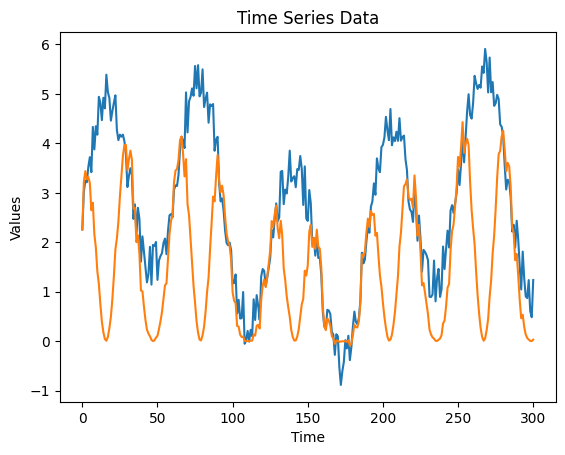

In [29]:
# データファイルを読み込みます。
# Aは、Aだけで適当につくったデータ。例えば気温だとする
# Bは、Aの状態に依存して適当につくったデータ。例えば人の気分のパラメタだとする。
# BはAに依存するが、逆はしない。この因果関係を当てれるか？という話。

url = 'https://raw.githubusercontent.com/hosodakazufumi/note/main/data/timeseries.csv'
data = pd.read_csv(url)

# プロット

plt.plot(data['Unnamed: 0'], data['A'], label='A')
plt.plot(data['Unnamed: 0'], data['B'], label='B')
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Values')

# 表示
data

For A:  ADF Statistic= -7.144147880652194 ; p-value= 3.2657220418668163e-10
For B:  ADF Statistic= -3.6649448214768086 ; p-value= 0.004634144821001699
For B+:  ADF Statistic= -0.31613130287246427 ; p-value= 0.9231883807036498
                               SARIMAX Results                                
Dep. Variable:                      A   No. Observations:                  301
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -158.932
Date:                Fri, 29 Aug 2025   AIC                            323.865
Time:                        17:49:35   BIC                            334.976
Sample:                             0   HQIC                           328.311
                                - 301                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


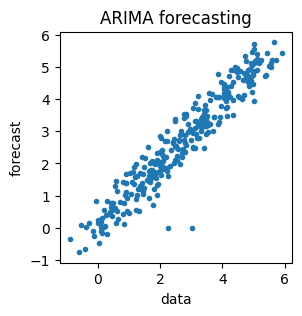

In [30]:
# 色んな時系列解析

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.arima.model import ARIMA


# 拡張ディッキー–フラー検定(ADF検定；定常か否か)
adf_test = adfuller(data['A'])
print('For A: ', 'ADF Statistic=', adf_test[0], '; p-value=', adf_test[1]) #p<0.05で定常

adf_test = adfuller(data['B'])
print('For B: ', 'ADF Statistic=', adf_test[0], '; p-value=', adf_test[1]) #p<0.05で定常

adf_test = adfuller(data['B']+np.arange(len(data['B'])))
print('For B+: ', 'ADF Statistic=', adf_test[0], '; p-value=', adf_test[1]) #増え続けるような値を敢えて足すと、p>0.05で非定常


# ARIMAモデル（予測）
arima_model_a = ARIMA(data['A'], order=(1, 1, 1)).fit()
arima_summary_a = arima_model_a.summary()
print(arima_summary_a)

# ARIMA確認
a1 = -0.1773 # ar.L1
m1 = -0.1127 # ma.L1
y = np.zeros_like(data['A'])
for i in np.arange(1,len(y)-1):
  y[i+1] = data['A'][i] +  a1*(data['A'][i]-data['A'][i-1])+m1*arima_model_a.resid[i]
plt.figure(figsize=(3,3))
plt.plot(data['A'], y,'.')
plt.title('ARIMA forecasting')
plt.xlabel('data')
plt.ylabel('forecast')



# Granger因果('ssr_ftest': (xxx, xxx, xxx, xxx) の２番目がp値)
granger_test_result = grangercausalitytests(data[['A', 'B']], 1, verbose=False)
print('A to B: ', granger_test_result) # 「AがBに対してグレンジャー因果関係がない」 = 「Aの過去の値がBの将来の値に対して統計的に有意な予測力を持たない」（AがBに影響しない的）

granger_test_result = grangercausalitytests(data[['B', 'A']], 1, verbose=False)
print('B to A: ', granger_test_result)


In [31]:
# Empirical Dynamic Modeling（経験的動的モデリング）
# まずはインストール
!pip install pyEDM

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 4.4 MB/s eta 0:00:00


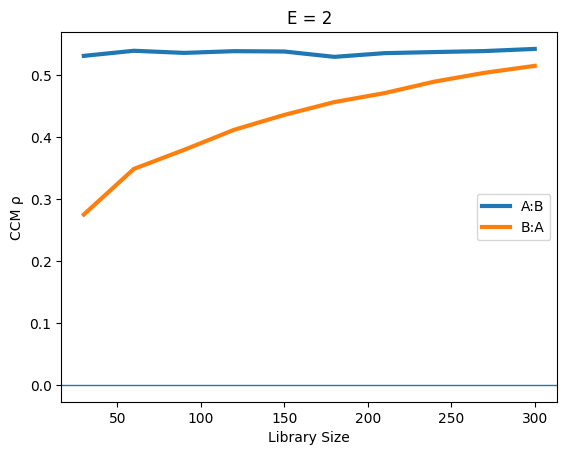

,LibSize,A:B,B:A
0,30,0.530690,0.274800
1,60,0.538914,0.348419
2,90,0.535479,0.379055
3,120,0.538258,0.411455
4,150,0.537739,0.435427
5,180,0.529088,0.456183
6,210,0.535058,0.470580
7,240,0.536835,0.489176
8,270,0.538453,0.503371
9,300,0.541890,0.514580


In [32]:
# EDMのCCM（Convergent cross mapping：因果関係解析）を実施。
# A→Bを予想する場合には、最初から高い値だが、データを増やしても増えていかない。つまり、AはBから影響を受けない。
# B→Aを予想する場合には、データを増やすと予測力が上がる。それはBの時系列データの中にAの情報が含まれていることを意味する。つまり、BはAから影響を受けている。

import pyEDM
# https://sugiharalab.github.io/EDM_Documentation/ccm_/

pyEDM.CCM( dataFrame = data, E = 2, Tp = 0, columns = "A", target = "B", libSizes = "30 300 30", sample = 100, showPlot = True)


# ⑤ ちょっと自分事と思ってやってみましょう。
前提として、自分でデータを持っていて、これを各自のGoogleDriveにアップし、そのファイルを解析することを想定します。
1. とりあえずファイルをダウンロードする
  - https://github.com/hosodakazufumi/note/blob/main/data/data_sample.csv?raw=true
2. ファイル「data_sample.csv」を、各自のGoogleドライブの、「マイドライブ」の中の「data」というフォルダに入れる。
3. ここで、Geminiにお願いしてみましょう。右上のGeminiを押してください。
  - ファイルをプロンプト入力欄にドラッグして、以下のプロンプトをお願いします。
  - このデータ「data_sample.csv」が、Googleドライブの、「マイドライブ」の中の「data」というフォルダに入っています。これは、色んな人の健康パラメタのデータです。Google colabでこれを読み込んで、たくさんのパラメタをPCAで２次元にし、どの人と、どの人が似ているかがわかる、PCAの二次元プロットをしたいです。続いて、PCAとは別に、どの人とどの人が似ているかという、階層クラスタリングをしたいです。その後、さらに、"class"というカラムにあるクラス分けを基準として、どの人とどの人が似ているかという、LDAの２次元のプロットをしたいです。これらを実行するPythonコードをください。なお、実行は私がするので、自動で実行する必要はなく、コードのテキストだけ、いまカーソルがいる、一番下のセルに表示して下さい。
4. それを実行します。Google Driveへのアクセス権を質問されるので、許可します。すると、実行されて、グラフが表示され、またdataフォルダにcsvが出力されます。
- ちょっと驚きましたが、いきなりやってくれました。これは出てきたそのままなので、これを少し改変することで、思いのままの解析ができると思います。何回もやったところ、少しエラーがでることもあります。その時も、GeminiまたはChatGPTなどとやり取りして、解決していくことができます。（日本語でなければバグはほぼ出ないのですが・・・）
- もちろん、これと同じことを、ご自身のデータで行うことができます。
- ※ただし、個人情報の取り扱いはくれぐれもご注意ください。機密性の高いデータは必ず、問題の内容の情報を変えるか、ColabではなくPythonを自分のPCで実行してください。
- どのようにして解析されたのかが、プログラムとして正確に記述されているので、謎も全くありません。

- ※注意点として、日本語にするといろんなバグが起きやすいです。


Mounted at /content/drive
--- PCA ---


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


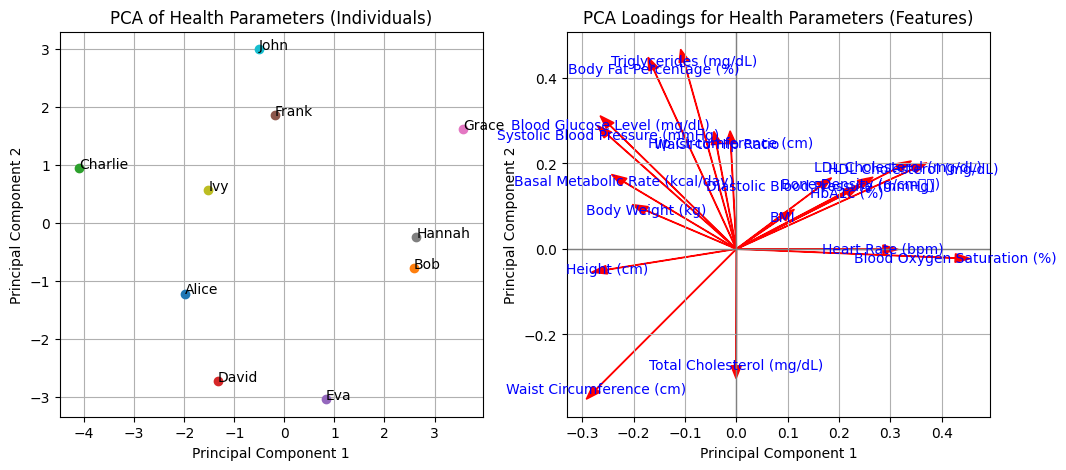


--- Hierarchical Clustering ---
Hierarchical Clustering (Persons) - 3 clusters: [3 1 3 2 2 3 1 1 3 3]


/tmp/ipython-input-1324536650.py:81: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1324536650.py:81: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


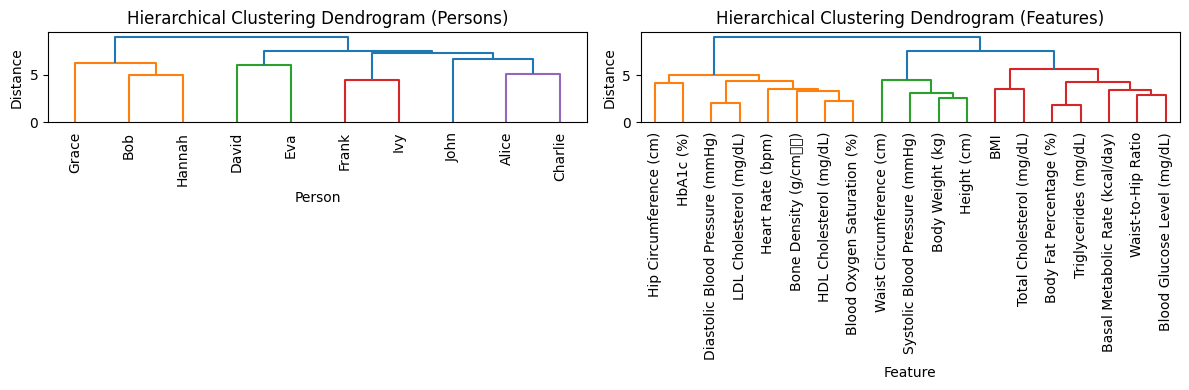


--- LDA ---


/tmp/ipython-input-1324536650.py:120: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1324536650.py:120: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65410 (\N{HALFWIDTH KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65394 (\N{HALFWIDTH KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


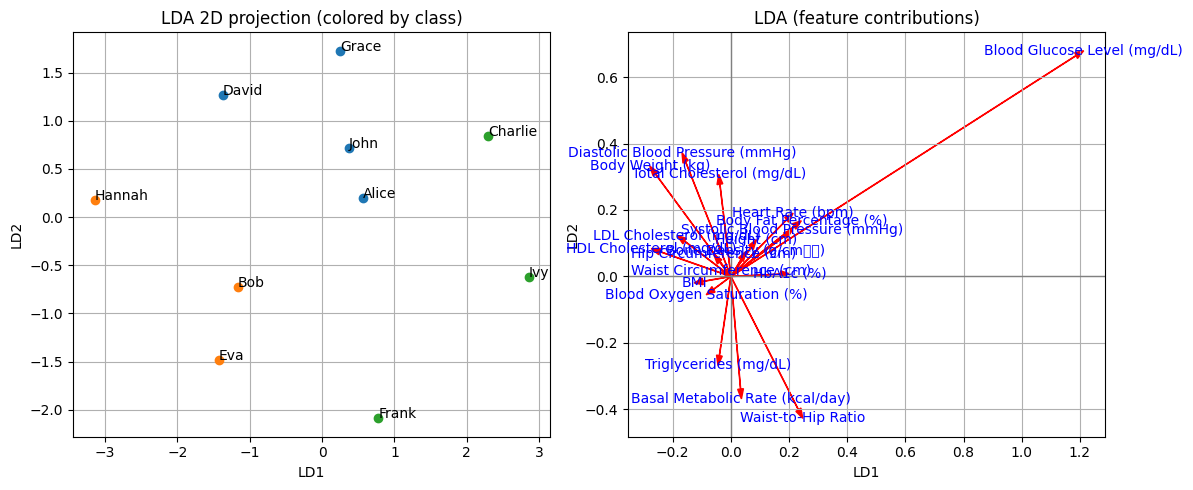

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
from google.colab import drive

# Google ドライブをマウント
drive.mount('/content/drive')

# データの読み込み
file_path = '/content/drive/My Drive/data/data_sample.csv'
df = pd.read_csv(file_path)

# データ部分とラベルを取得
xname = df['Name'].values
xparams = df.columns[3:].values
x = df.iloc[:, 3:].values.copy()
y = df['class'].values

# データの標準化
x_normalized = StandardScaler().fit_transform(x)

# --- PCA (主成分分析) ---
print("--- PCA ---")
pca = PCA(n_components=2)
xpc = pca.fit_transform(x_normalized)

plt.figure(figsize=(12, 5))
plt.subplot(121)
for i in range(x.shape[0]):
    plt.plot(xpc[i, 0], xpc[i, 1], 'o')
    plt.text(xpc[i, 0], xpc[i, 1], xname[i])

plt.title('PCA of Health Parameters (Individuals)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# 各パラメタの寄与を表示
kiyo = pca.components_.T
plt.subplot(122)
for i in range(len(xparams)):
    plt.arrow(0, 0, kiyo[i, 0], kiyo[i, 1], color='r', head_width=0.02)
    plt.text(kiyo[i, 0], kiyo[i, 1], xparams[i], color='b', ha='center', va='center')

plt.title('PCA Loadings for Health Parameters (Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()


# --- 階層クラスタリング ---
print("\n--- Hierarchical Clustering ---")

# 人物に対する階層クラスタリング
Z_person = linkage(x_normalized, method='ward')
labels_k_person = fcluster(Z_person, t=3, criterion='maxclust') # 3つのクラスタに分ける
print("Hierarchical Clustering (Persons) - 3 clusters:", labels_k_person)

plt.figure(figsize=(12, 4))
plt.subplot(121)
dendrogram(Z_person, labels=xname, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Persons)')
plt.xlabel('Person')
plt.ylabel('Distance')

# パラメータに対する階層クラスタリング
Z_params = linkage(x_normalized.T, method='ward')
plt.subplot(122)
dendrogram(Z_params, labels=xparams, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Features)')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


# --- LDA (線形判別分析) ---
print("\n--- LDA ---")

# 標準化されたデータとクラスラベルでLDAを実行
lda = LDA(n_components=2)
xlda = lda.fit_transform(x_normalized, y)

# 2Dプロット（classで色分け、各点に名前を注記）
cmap10 = plt.get_cmap("tab10")
plt.figure(figsize=(12, 5))
plt.subplot(121)
for i in range(x.shape[0]):
    plt.plot(xlda[i, 0], xlda[i, 1], 'o', color=cmap10(y[i]))
    plt.text(xlda[i, 0], xlda[i, 1], xname[i])

plt.title("LDA 2D projection (colored by class)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(True)
plt.tight_layout()

# 特徴量の寄与ベクトル（scalings_ を利用）
plt.subplot(122)
loadings = lda.scalings_[:, :2]
for i, feat in enumerate(xparams):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='r', head_width=0.02, length_includes_head=True)
    plt.text(loadings[i, 0], loadings[i, 1], feat,
             color='b', ha='center', va='center')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.title("LDA (feature contributions)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(True)
plt.tight_layout()
plt.show()

# ⑥ 例として、顕微鏡画像を解析してみます。
- 以下のことをやってみました。
1. ChatGPTに、以下の質問をしました。（Geminiの答えはイマイチでした）
  - 以下のURLの細胞の顕微鏡画像で、学習済みの深層学習モデルを用いて、各細胞の領域を検出したいです。どのモデルを使うのが今のスタンダードでしょうか？ https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/SK8-18-2_human_derived_cells%2C_fluorescence_microscopy_%2829942101073%29.jpg/960px-SK8-18-2_human_derived_cells%2C_fluorescence_microscopy_%2829942101073%29.jpg
2. すると、（要するに）以下のように帰ってきました。
  - 汎用かつ手軽に始めたいなら、Cellpose や StarDist が実績豊富でおすすめ。
3. よって、以下のように質問しました。
  - ありがとうございます。では、GoogleColabで、Cellposeを用いて、以下の画像の細胞を検出したいです。Cellposeのインストール方法と、その後に、検出するコードをください。（上記URLをもう一度貼り付け）
4. 実はこの間に、Versionの違いでエラーが出ました。しかし、Versionの確認方法もChatGPTが教えてくれて、正しいVersionを教えたところ、以下のように実行可能なコードをくれました。
5. ただし、CellposeはGPUじゃないと非常に遅いので、以下のようにして、先にGPUにしました。
  - GoogleColabの上にあるメニューの「ランタイム」→「ランタイムのタイプを変更」、から、GPU（T4 GPU）を選ぶ。
6. そして、以下を実行します。結果として、マスクのファイルがダウンロードできました。もちろん、これはGPTが言ってきたコードそのままで、全く最適化してないので、CellposeのHPを読んで、もっと丁寧にすることができます。
  - https://www.cellpose.org/

In [34]:
# インストール（これもGPTが教えてくれます）
!pip -q install -U cellpose scikit-image matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 34.8 MB/s eta 0:00:00


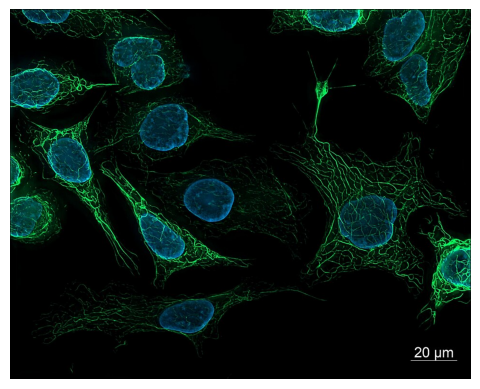

In [35]:
# 画像のダウンロードと表示
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/SK8-18-2_human_derived_cells%2C_fluorescence_microscopy_%2829942101073%29.jpg/960px-SK8-18-2_human_derived_cells%2C_fluorescence_microscopy_%2829942101073%29.jpg"

# User-Agent を付けてダウンロード
headers = {"User-Agent": "Mozilla/5.0"}
resp = requests.get(url, headers=headers, timeout=30)

# バイナリを Pillow で開く
img_pil = Image.open(BytesIO(resp.content)).convert("RGB")
img = np.array(img_pil)

plt.imshow(img)
plt.axis("off")
plt.show()


In [36]:
# Cellpose でセグメンテーション（nuclei モデル）
from cellpose import models

# v4 のモデル呼び出し
model = models.CellposeModel(model_type='nuclei', gpu=True)

# v4 では画像はリストで渡す
masks, flows, styles = model.eval(
    [img],                 # リスト形式で渡す
    diameter=None,
    channels=[0,0]
)

# 1枚だけ処理した場合は最初の要素を取り出す
masks = masks[0]
print("masks shape:", masks.shape, " unique labels:", masks.max())




Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.6 
platform:       	linux 
python version: 	3.12.11 
torch version:  	2.8.0+cu126! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




100%|██████████| 1.15G/1.15G [00:11<00:00, 110MB/s]


masks shape: (771, 960)  unique labels: 105


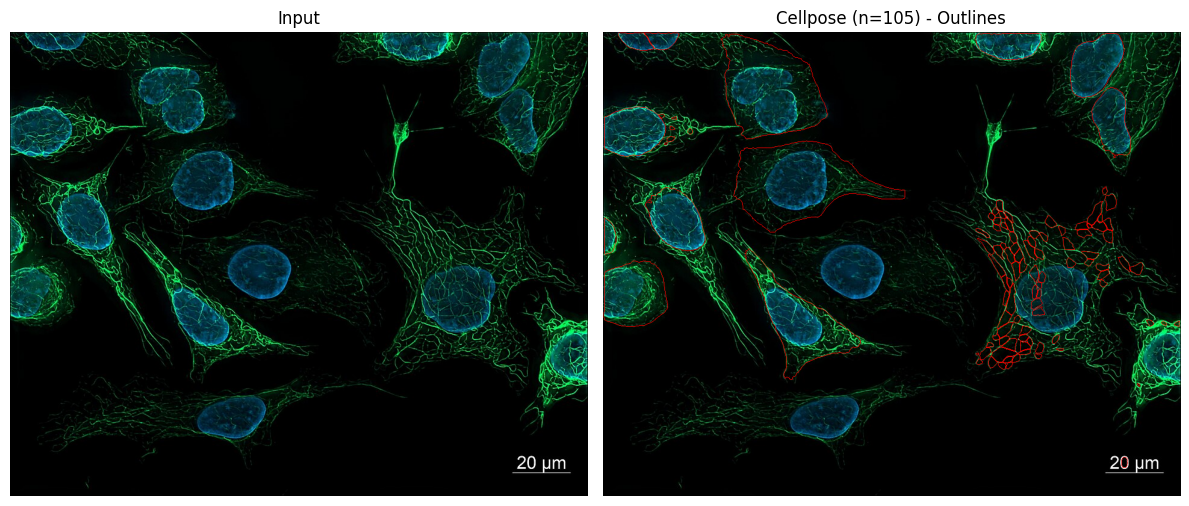

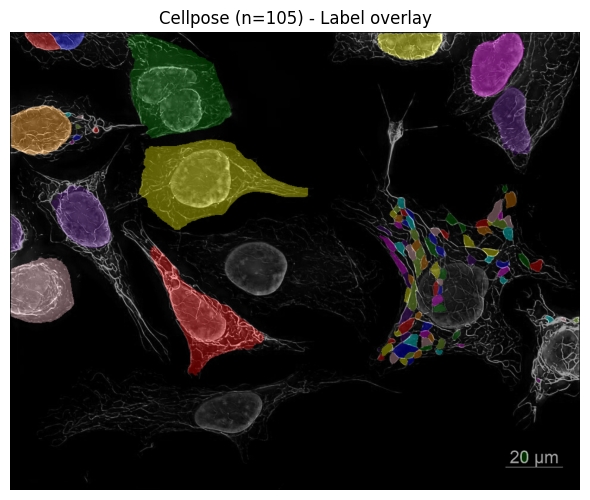

In [37]:
# 結果の可視化（イマイチですが・・・）
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from cellpose import utils

# 画像を uint8 の RGB に揃える（可視化の安定化のため）
img_vis = img
if img_vis.dtype != np.uint8:
    img_vis = np.clip(img_vis, 0, 255).astype(np.uint8)
if img_vis.ndim == 2:
    # もしグレースケールなら RGB に拡張
    img_vis = np.stack([img_vis]*3, axis=-1)

# --- 4a) アウトライン重ね描き ---
outline_mask = utils.masks_to_outlines(masks)   # True の画素が輪郭
overlay = img_vis.copy()
overlay[outline_mask] = [255, 0, 0]             # 輪郭を赤で強調

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_vis)
plt.title("Input")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(overlay)
plt.title(f"Cellpose (n={int(masks.max())}) - Outlines")
plt.axis("off")
plt.tight_layout()
plt.show()

# --- 4b) ラベル着色（半透明合成） ---
# 背景=0 を透明にして、各セルを異なる色で表示
seg_rgb = label2rgb(masks, image=img_vis, bg_label=0, alpha=0.35)

plt.figure(figsize=(6,6))
plt.imshow(seg_rgb)
plt.title(f"Cellpose (n={int(masks.max())}) - Label overlay")
plt.axis("off")
plt.tight_layout()
plt.show()


In [38]:
# マスクの保存（PNG & NumPy）
import os
from PIL import Image as PILImage
import shutil
from google.colab import files

os.makedirs("outputs", exist_ok=True)

# (a) ラベルマスクを可逆に保存（16-bit PNG）
#   0=背景, 1..N=セルID （これはそのまま開いたら真っ黒に見えるかも）
PILImage.fromarray(masks.astype(np.uint16)).save("outputs/masks_uint16.png")

# (b) アウトラインのオーバーレイ画像の保存
PILImage.fromarray(overlay).save("outputs/overlay_outlines.png")

# (c) ラベル着色のオーバーレイ（float→uint8へ）
seg_rgb_uint8 = np.clip(seg_rgb*255, 0, 255).astype(np.uint8) if seg_rgb.dtype != np.uint8 else seg_rgb
PILImage.fromarray(seg_rgb_uint8).save("outputs/overlay_label2rgb.png")

# (d) 解析用に .npy も保存
np.save("outputs/masks.npy", masks)

print("Saved files:", os.listdir("outputs"))

# outputs フォルダを zip 化
shutil.make_archive("outputs", "zip", "outputs")

# ダウンロード
files.download("outputs.zip")


Saved files: ['masks.npy', 'overlay_outlines.png', 'masks_uint16.png', 'overlay_label2rgb.png']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>